## Delay spectra amplitudes and delays plotting
Katherine Elder

When we made movies of the raw cross-polarized data for the entire IDR2.1 run, we noticed objects that didn't change with time. This would suggest that the sources of those objects were not part of the sky, but from the other antennas and array set up. To investigate this further, we took a look at the delay spectrum. As we looked at the various plots, patterns started appearing. For instance, for many antenna pairs, the highest peak in the graph would appear at a delay time roughly corresponding to the baseline between the antenna in nanosecond. 

### Part 1: Matrix Plots

To get a better look at this and possibly pick up on more patterns, we decided to plot matricies of the antenna pairs. The color of the squares relate to either the amplitude of the maximum peak of the delay transform for the given antenna pair, or the corresponding delay time of the peak. 

To do this, we read in a file holding the entire run of data (created by read_all_uvfits.py) and then run through every unique antenna pair and take the delay transform. Without plotting the delay spectrum, we find the maximum amplitude (y-value) and it's corresponding delay (x-value). These numbers are placed into arrays and the loop moves onto the next antenna pair. 

#### Step 1:

Import the necessary packages and define universial constants, then read the data files into uv objects. 

These files were created by read_all_uvfits.py using the data from the IDR2.1 LSTBIN. 

In [1]:
#Initialize matplotlib notebook
%matplotlib notebook

#Import needed packages
from pyuvdata import UVData
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import matplotlib
import amp_delay_plotting as adp

#Create uv elements
uv = UVData()

#Define constants
#The speed of light, with power adjusted for desired units
c = 0.299792
#The speed of light in a cable correction factor
f = 0.83

#Create an array of antennas we want to flag
flagged_antennas = [0,2,26,50,98,136]

#Read in the data file
uv.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/combined_files/zen.grp1.of1.yx.LST.run_8.uvOCRSL.uvfits')


Before working with the data, we will define functions to call later in the code. This helps us streamline the code and cut down on unnecessarly repeating code. The full definitions and parameters for these functions can be found in amp_delay_plotting.py.

<b>find_blin_length</b> : The purpose of this function is to read in the selected antenna and calculate the length of each baseline

<b>check_antnum</b> : The purpose of this function is to check to see if the entered antenna number matches with a known antenna number

<b>make_max_arrays</b> : The purpose of this function is to read in all antenna pairs and produce an array of the absolute maximum amplitudes of the delay transform and an array of the corresponding delay times. 

<b>make_blin_depd_arrays</b> : The purpose of this function is to read in all antenna pairs and produce an array of the baseline dependent maximum amplitudes and an array of the corresponding delay.

<b>make_blin_ind_arrays</b> : The purpose of this function is to read in all antenna pairs and produce an array of the baseline independent maximum amplitudes and an array of the corresponding delays. 

<b>make_matrix_array</b> : The purpose of this function is to correctly fill the arrays that will be used to plot the matrices. 

<b>plot_matrix_array</b> : The purpose of this function is to plot the matrix arrays for both amplitude and delay

<b>plot_position_array</b> : The purpose of this function is to plot the antenna array in their physical locations, with one plot using the amplitude as the color scale and the other plot using the delay times as the color scale. 

<b>plot_delay_position</b> : The purpose of this function is to plot the antenna array based on the distance given by the delay time

#### Step 2: 

Now that all of our functions are defined, it is time to create the plots for the data. 

We first call our functions to create the arrays, then plot. 

In [2]:
#Initialize the array for the amplitudes of the data and the corresponding delay
#The only required parameter is the uv object
max_amp, delay = adp.make_max_arrays(uv = uv)

#Print the shape of the arrays to verify that the function worked properly
print delay.shape
print max_amp.shape

#Initialize the matrix arrays of the data
#The arrays created above are passed into the function 
amp_matrix, delay_matrix = adp.make_matrix_array(amp_array = max_amp, delay_array = delay)

#Print the shape of the arrays to verify that the function worked properly
print amp_matrix.shape
print delay_matrix.shape

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


Now that the arrays have been created and formatted correctly, it is time to plot the matrices.

<IPython.core.display.Javascript object>


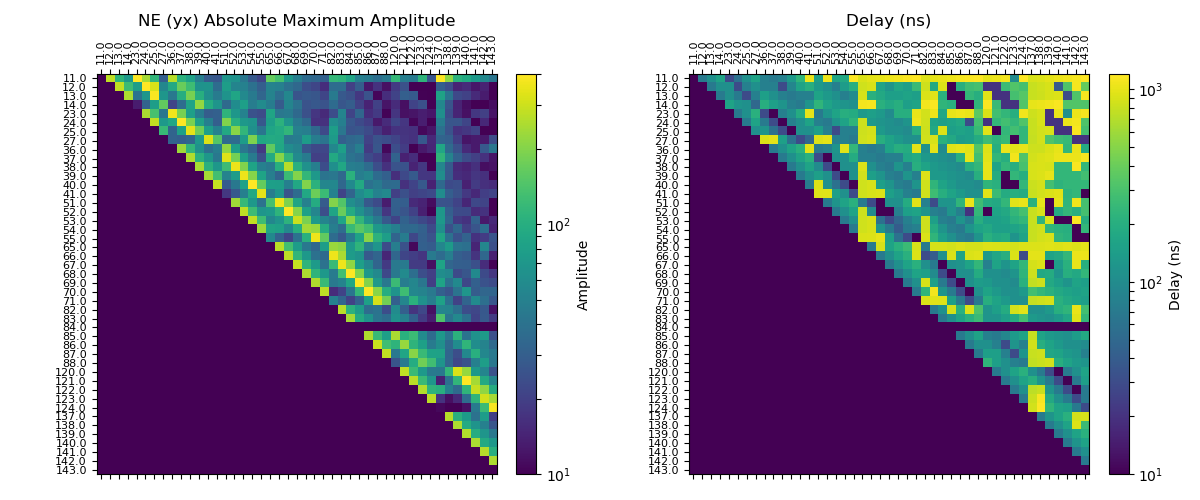

In [3]:
#Call the matrix plotting function

#The arrays created above are passed into the function
#The color scale for the second plot, which corresponds to the delay time, is passed through vmin and vmax
#The title of the plot is specified
adp.plot_matrix_array(amp_array = max_amp, amp_matrix = amp_matrix, delay_matrix = delay_matrix,
                      vmin1 = 10, vmax1 = 400,
                      vmin2 = 10, vmax2 = 1200,
                      title='NE (yx) Absolute Maximum Amplitude')

### Part 2: Antenna position plots

We've been able to plot matrices of the maximum amplitude, but now we want to be able to visualize where the antennas actually are in relation to each other (for instance, we could then see if the antennas next to each other are most strongly correlated). 

We will do this by first having the user enter an antenna number. This antenna will be the "focus antenna" which will then be paired with every other antenna to look at the amplitudes and delays, as seen above. Essentially, we will be looking at a single row or column of the matrix plots above. 

#### Step 1: 

First, we find the antenna positions and antenna numbers listed in the data. Then we prompt the user to enter an antenna number. This number is fed into a check function and then the arrays are created.

In [4]:
#Read in the position and antenna numbers for all antennas
antpos, ants = uv.get_ENU_antpos()

In [36]:
#Ask the user to input the desired antenna
focus_ant = input("Which antenna would you like to look at? Enter here: ")
#Take the input and represent as an integer
focus_ant = int(focus_ant)
#Run a check that the number is valid
focus_ant = adp.check_antnum(antnum = focus_ant,ants = ants)

Which antenna would you like to look at? Enter here: 88


In [37]:
#Call make_array functions for the data

#Create the arrays for the max amplitude and corresponding delay for the data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_amp, full_ant_delay = adp.make_max_arrays(uv = uv, keep_flags = True)

#Create the matrix arrays for the data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
all_ants_amp, all_ants_delay, index, dindex = adp.make_matrix_array(amp_array = full_ant_amp, 
                                                                      delay_array = full_ant_delay, 
                                                                      antnum = focus_ant, index = True)

Now we can actually plot the antennas with both amplitude and delay fuctioning as the color scale

<IPython.core.display.Javascript object>


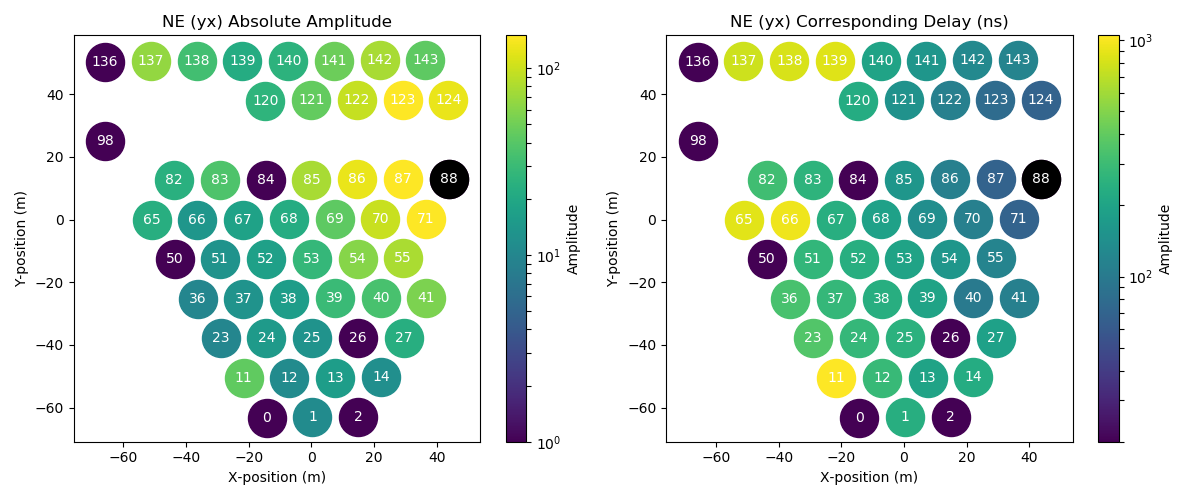

In [50]:
#Call the position plotting function for the data

#The arrays created above are passed into the function
#The index and delay index values are passed
#The color scale for the second plot, which corresponds to the delay time, is passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = all_ants_amp, delay_array = all_ants_delay,
                        index = index, dindex = dindex, uv = uv, antnum = focus_ant,
                        vmin1 = 1, vmax1 = 150,
                        vmin2 = 20, vmax2 = 1050,
                        title1 = 'NE (yx) Absolute Amplitude',
                        title2 = 'NE (yx) Corresponding Delay (ns)')


#### Step 2:

Now let's look at how far away the delay times correspond to. This means that instead of plotting the antenna amplitudes at the given antenna location, we need to plot them at the distance given by the delay. 

The delay is given in ns and we need it in m: distance = all_ants_delay[index,aa] $*$ 3e8

OR, taking into account the fact that light moves more slowly in cables:

distance = all_ants_delay[index,aa] $*$ 3e8 $*$ 0.83

We also need to know the physical distance separating the antennas. This is done inside the position plotting functions by calling the find baseline function. 

In [39]:
#Create an array which holds the delay times in meters
delay_distance = all_ants_delay * c

#Create an array which holds the delay times in meters, with the cable correction factor
dd_cable = all_ants_delay * c * f


<IPython.core.display.Javascript object>


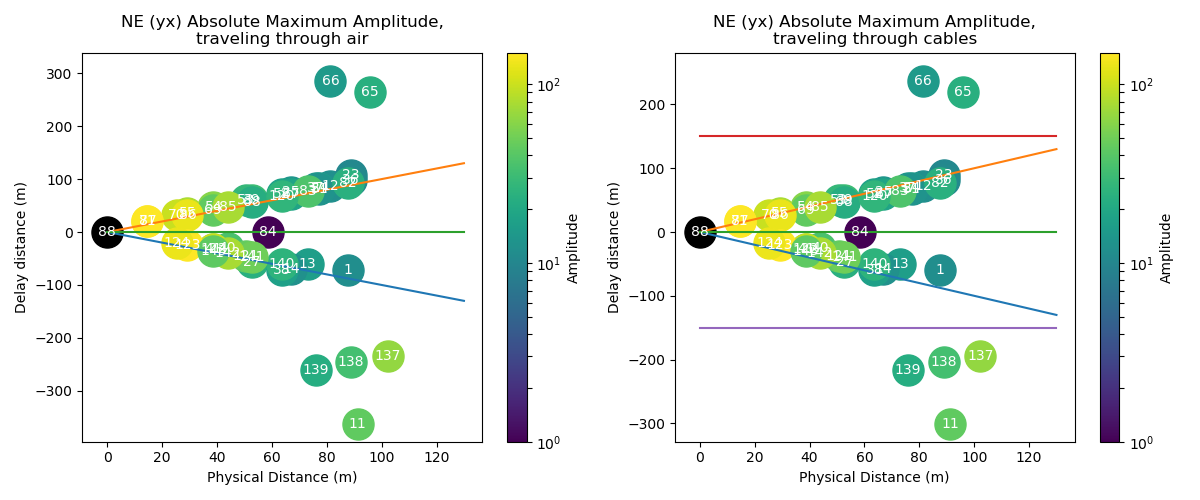

In [40]:
#Call the delay position plotting function for the data

#The arrays created above are passed into the function along with the amplitude array
#The index values are passed (they are both index)
#The color scale for the second plot, which corresponds to the delay time, is passed through vmin and vmax
#The titles of the plots are specified
adp.plot_delay_position(amp_1 = all_ants_amp, delay_dis_1 = delay_distance,
                        amp_2 = all_ants_amp, delay_dis_2 = dd_cable,
                        index1 = index, index2 = index, uv = uv, antnum = focus_ant,
                        vmin1 = 1, vmax1 = 150, 
                        vmin2 = 1, vmax2 = 150,
                        title1 = 'NE (yx) Absolute Maximum Amplitude,\ntraveling through air',
                        title2 = 'NE (yx) Absolute Maximum Amplitude,\ntraveling through cables')


### Part 3: Baseline Dependent and Independent plots

The plots we have been making have been based on the absolute maximum values in the delay spectrum, but this means that we are losing some of the information in the plots. For instance, on short baselines, the baseline dependent peak dominates and we can't see any of the peaks relating to cables or other sources. 

To account for this, we split up the window of where we are looking for maximum amplitudes. We already identified that the baseline shows up in the delay spectrum, so one part will be focused on the length of the given baseline. The second part will look at everything outside of the baseline dependent portion of the delay spectrum. 

#### Step 1: Baseline Dependent Plots

First, we will look at the baseline dependent amplitudes. These are the maximum amplitudes that fall within the distance of baseline. The longest baseline is ~120 m, so we narrow our window to only find amplitudes within 120 m on either side of the chosen antenna. 

We call the made_array function to create the arrays of amplitudes and delays. Then we call the make_matrix function to correctly format the arrays we just created so they can be plotted. Finally, we call the plot_matrix function and pass in all the required information to plot the matrix arrays. 

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


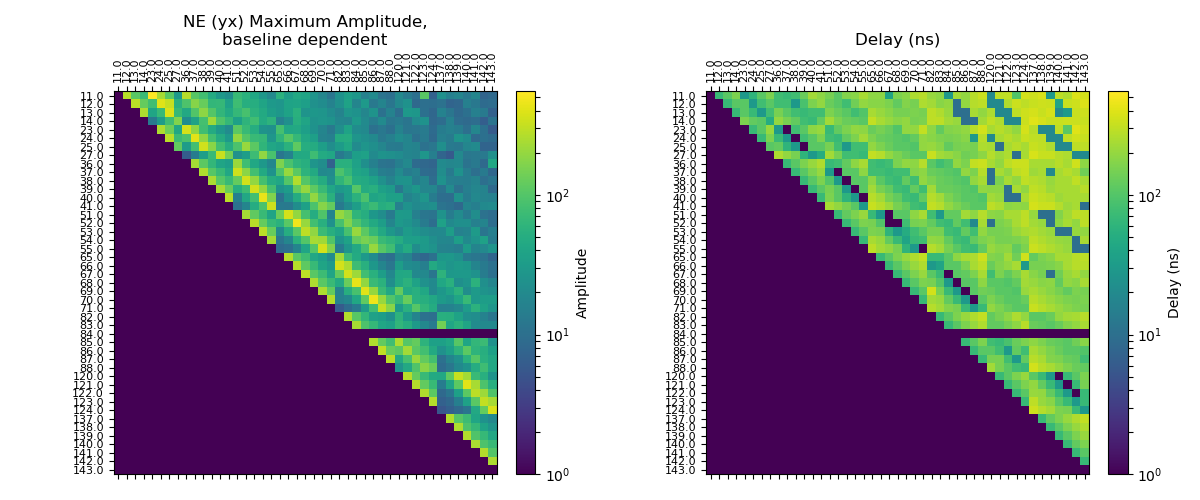

In [41]:
#Call the make_array functions to create the arrays for the baseline dependent amplitudes

#Create the arrays for the max amplitude and corresponding delay for the data
#The only parameter passed is the uv object
blin_amp, blin_delay = adp.make_blin_depd_arrays(uv = uv)

#Print the shape of the arrays to check that everything is working correctly
print blin_delay.shape
print blin_amp.shape

#Create the matrix arrays for the data
#The two arrays created above are passed into the function
blin_amp_matrix, blin_delay_matrix = adp.make_matrix_array(amp_array = blin_amp, 
                                                                 delay_array = blin_delay)

#Print the shape of the arrays to check that everything is working correctly
print blin_amp_matrix.shape
print blin_delay_matrix.shape

#The arrays created above are passed into the function
#The color scales for both plots are passed through vmin and vmax
#The title of the plot is specified
adp.plot_matrix_array(amp_array = blin_amp, amp_matrix = blin_amp_matrix, delay_matrix = blin_delay_matrix,
                      vmin1 = 1, vmax1 = 550, vmin2 = 1, vmax2 = 550,
                      title = 'NE (yx) Maximum Amplitude,\nbaseline dependent')

Now that we have printed the matrix plots, we want to look at the antenna positions. 

We call the make_array functions to create the baseline dependent arrays, with the correct formatting to properly plot the physical positions of the antennas. We call the plot_position function to take the arrays we just created and plot them. 

This allows us to easily see how the physical distance between antennas affects the amplitude and delay. 

<IPython.core.display.Javascript object>


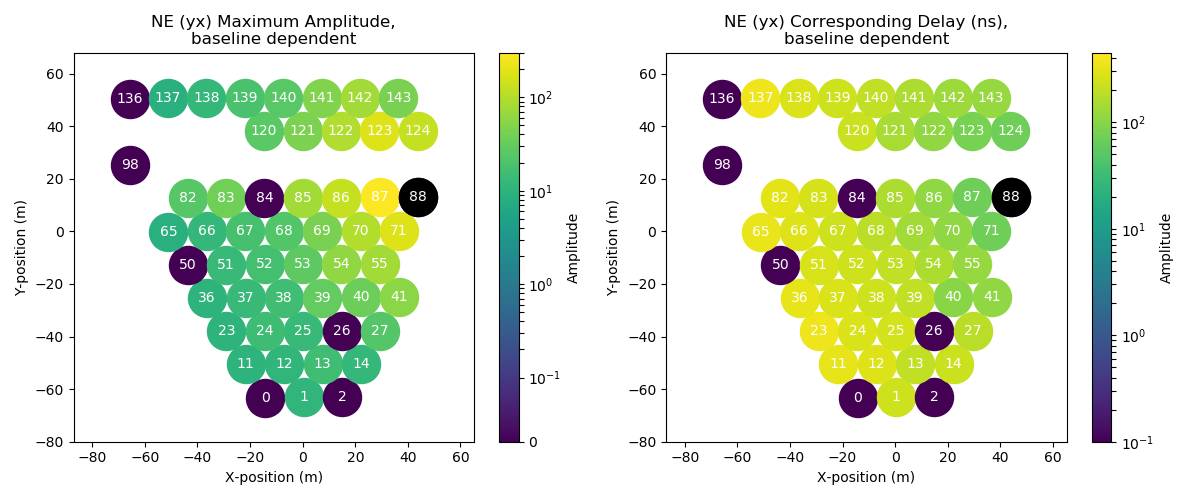

In [42]:
#Create the arrays for the maximum values and the matrix, then plot

#Create the arrays for the max amplitude and corresponding delay for the data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_amp, full_ant_delay = adp.make_blin_depd_arrays(uv = uv, keep_flags = True)

#Create the matrix arrays for the data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
blin_ants_amp, blin_ants_delay, index, dindex = adp.make_matrix_array(amp_array = full_ant_amp, 
                                                                            delay_array = full_ant_delay, 
                                                                            antnum = focus_ant, index = True)
#The arrays created above are passed into the function
#The index and delay index values are passed
#The uv object is passed along with the entered antenna number
#The color scales for for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = blin_ants_amp, delay_array = blin_ants_delay, 
                        index = index, dindex = dindex, uv = uv, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 300, 
                        vmin2 = 0.1, vmax2 = 450, 
                        title1 = 'NE (yx) Maximum Amplitude,\nbaseline dependent',
                        title2 = 'NE (yx) Corresponding Delay (ns),\nbaseline dependent')

#### Step 2: Baseline Independent plots

We've been able to isolate the amplitudes that are baseline dependent, now it's time to look at everything else. 

We repeat the same plots as above, but this time we use windows on either side of the baseline dependent delays to see what the amplitudes are. 

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


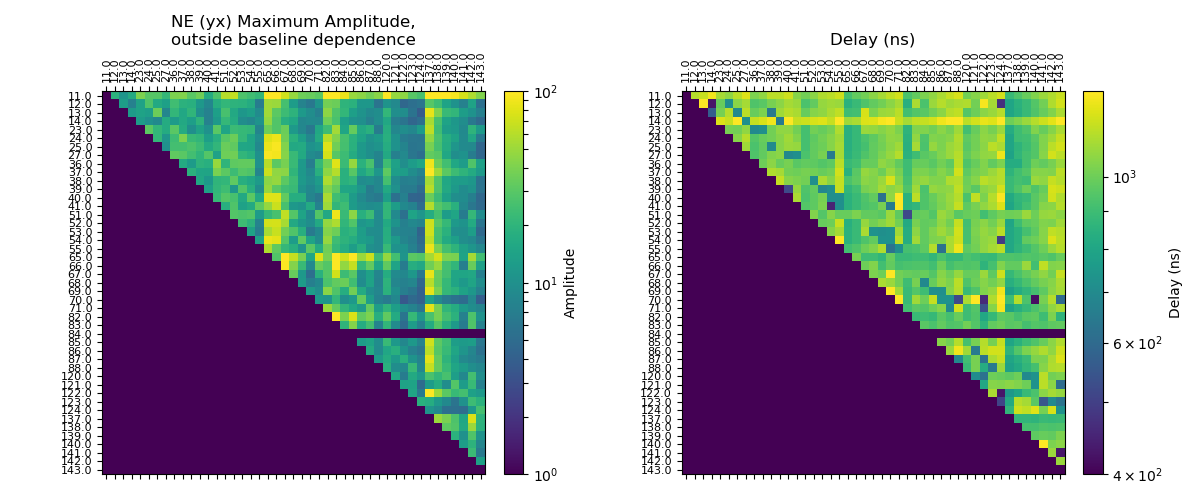

In [43]:
#Initialize the arrays for the baseline independent amplitudes of the data and the corresponding delay
#The only parameter passed is the uv object
ind_amp, ind_delay = adp.make_blin_ind_arrays(uv = uv)

#Print the shape of the arrays to verify that the function worked properly
print ind_delay.shape
print ind_amp.shape

#Initialize the matrix arrays of the data
#The arrays created above are passed into the function 
ind_amp_matrix, ind_delay_matrix = adp.make_matrix_array(amp_array = ind_amp, delay_array = ind_delay)

#Print the shape of the arrays to verify that the function worked properly
print ind_amp_matrix.shape
print ind_delay_matrix.shape

#The arrays created above are passed into the function
#The color scales for both plots are passed through vmin and vmax
#The title of the plot is specified
adp.plot_matrix_array(amp_array = ind_amp, amp_matrix = ind_amp_matrix, delay_matrix = ind_delay_matrix,
                      vmin1 = 1, vmax1 = 100,
                      vmin2 = 400, vmax2 = 1300,
                      title = 'NE (yx) Maximum Amplitude,\noutside baseline dependence')

<IPython.core.display.Javascript object>


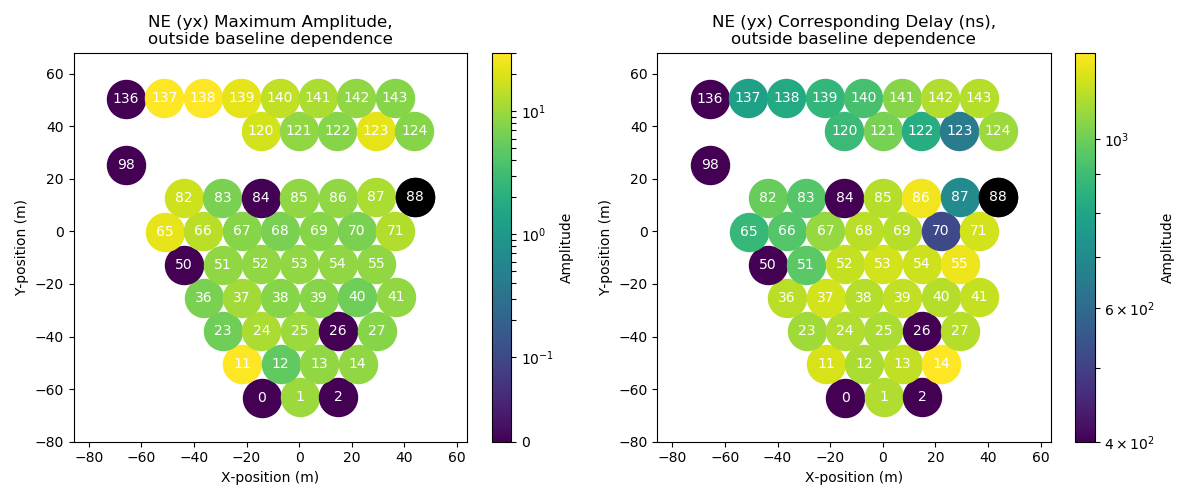

In [49]:
#Create the arrays for the max amplitude and corresponding delay for the baseline independent data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_ind_amp, full_ant_ind_delay = adp.make_blin_ind_arrays(uv = uv, keep_flags=True)

#Create the matrix arrays for the data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
ind_ants_amp, ind_ants_delay, index_ind, dindex_ind = adp.make_matrix_array(amp_array = full_ant_ind_amp, 
                                                                                  delay_array = full_ant_ind_delay, 
                                                                                  antnum = focus_ant, 
                                                                                  index = True)

#The arrays created above are passed into the function
#The index and delay index values are passed
#The uv object is passed along with the entered antenna number
#The color scales for for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = ind_ants_amp, delay_array = ind_ants_delay,
                        index = index_ind, dindex = dindex_ind, uv = uv, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 30,
                        vmin2 = 400, vmax2 = 1300, 
                        title1 = 'NE (yx) Maximum Amplitude,\noutside baseline dependence',
                        title2 = 'NE (yx) Corresponding Delay (ns),\noutside baseline dependence')

#### Step 3: Delay Distance Plots

The position plots are very helpful in recognizing patterns based on physical distances. However, the delay times seem to be implying more patterns that are hard to recognize as they are currently plotted. 

To get a better idea of what is going on with the delays, we will plot the delay in meters verses the baseline distance in meters. Now we will be able to see how far away the antenna is physically as well as how far the signal actually traveled. The color scale will be the amplitudes. 

We plot the baseline dependent data next to the baseline independent data. 

<IPython.core.display.Javascript object>


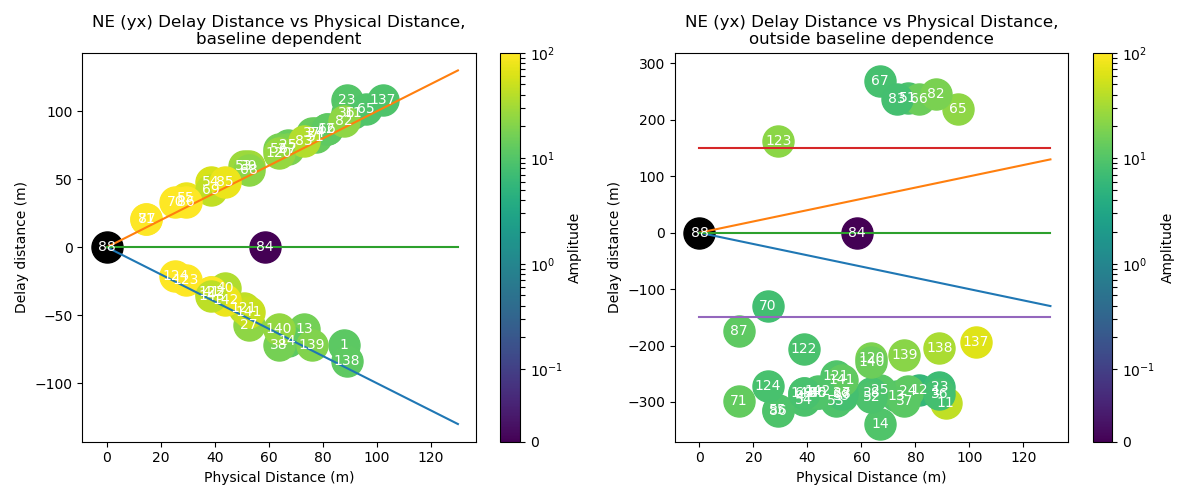

In [45]:
#Create an array which holds the baseline dependent delay times in meters
blin_delay_distance = blin_ants_delay * c
#Create an array which holds the baseline independent delay times in meters
ind_delay_distance = ind_ants_delay * c * f

#The arrays created above are passed into the function along with the amplitude array
#The index values are passed, along with the entered antenna number and uv object
#The color scales for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_delay_position(amp_1 = blin_ants_amp, delay_dis_1 = blin_delay_distance,
                        amp_2 = ind_ants_amp, delay_dis_2 = ind_delay_distance,
                        index1 = index, index2 = index_ind, uv = uv, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 100, 
                        vmin2 = 0, vmax2 = 100,
                        title1 = 'NE (yx) Delay Distance vs Physical Distance,\nbaseline dependent',
                        title2 = 'NE (yx) Delay Distance vs Physical Distance,\noutside baseline dependence')